In [28]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re 

In [29]:
fake = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [30]:
true = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv")
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


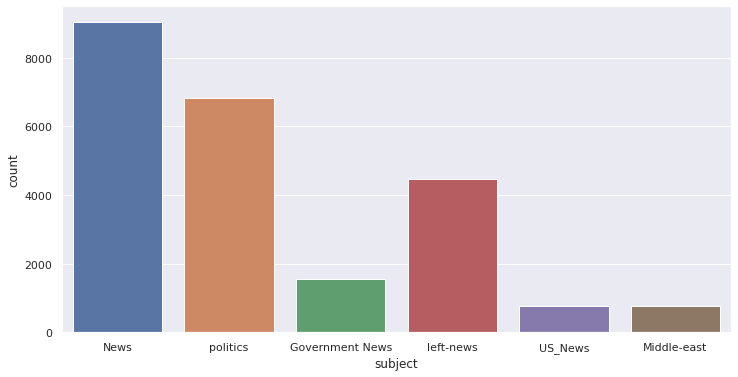

In [31]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot("subject", data= fake)

In [32]:
text = " ".join(fake["text"].tolist())
print(text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



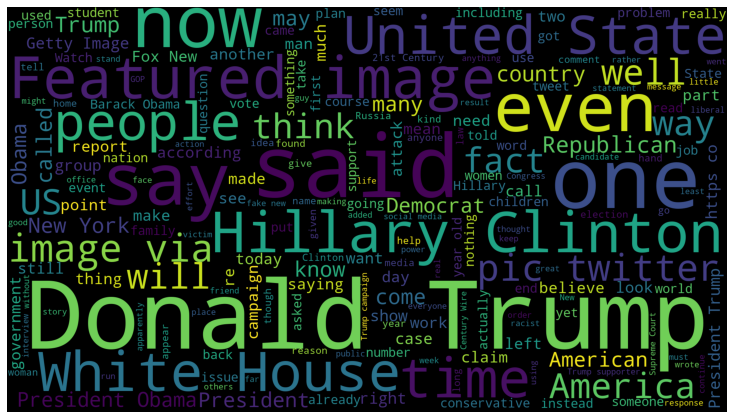

In [ ]:
wordcloud = WordCloud(width = 1920, height = 1080).generate(text)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)


In [33]:
text2 = " ".join(true["text"].tolist())
print(text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



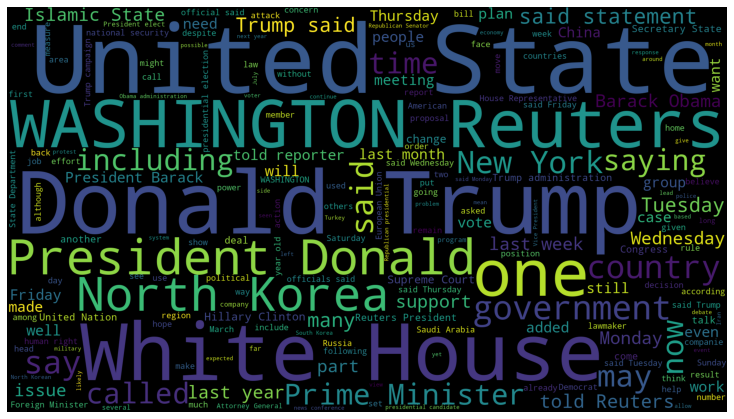

In [ ]:
wordcloud = WordCloud(width = 1920, height = 1080).generate(text2)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)

# Difference in Text
Real news seems to have source of publisher data which is not present in Fake news.

Looking at the Data


*   Most of the items ave reuters information such as **WASHINGTON (Reuters)**
*   Some text are tweets from twitter
*   Few text doot have publication info



# Cleaning the Data


*   Text can be splitted only once at "-" which is always present after mentioning  the soure of publication, which give us publisher part and text part.
*   If we not get text part that means publisher details was't given for that record.
*   The twitter tweets always have same source, a log text of max 259 characters.



In [34]:
unknown_publisher = []
for index, row in enumerate(true.text.values):
  try:
    record = row.split(' - ', maxsplit=1)
    record[1]
    assert(len(record[0])<260)
  except:
    unknown_publisher.append(index)

In [35]:
len(unknown_publisher)

35

In [36]:
true.iloc[unknown_publisher].text

2922     The following statements were posted to the ve...
3488     The White House on Wednesday disclosed a group...
3782     The following statements were posted to the ve...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5290     The following statements were posted to the ve...
5379     The following statements were posted to the ve...
5412     The following statements were posted to the ve...
5504     The following statements were posted to the ve...
5538     The following statements were posted to the ve...
5588     The following statements were posted to the ve...
5593     The following statements were posted to the ve...
5761     The following bullet points are from the U.S. ...
5784     Federal appeals court judge Neil Gorsuch, the ...
6026     The following bullet points are from the U.S. ...
6184     The following bullet points are from the U.S. ...
6660     Republican members of Congress are complaining.

In [37]:
true.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [38]:
true = true.drop(8970, axis=0)

In [39]:
publisher = []
tem_text = []
for index, row in enumerate(true.text.values):
  if index in unknown_publisher:
      tem_text.append(row)
      publisher.append("Unknown")
  else:
    record = row.split("-", maxsplit=1)
    publisher.append(record[0].strip())
    tem_text.append(record[1].strip())

In [40]:
true["publisher"] = publisher
true["text"] = tem_text

In [41]:
true[true["publisher"]== "Unknown"].sample(3)

,title,text,subject,date,publisher
6823,Commentary: Trump can't fight Islamic State wi...,Over the course of the U.S. presidential campa...,politicsNews,"December 7, 2016",Unknown
8194,Timeline: Zika's origin and global spread,The following timeline charts the origin and s...,politicsNews,"September 12, 2016",Unknown
5412,"Trump on Twitter (Feb 16) - Stock market, NYT,...",The following statements were posted to the ve...,politicsNews,"February 16, 2017",Unknown


In [42]:
true.shape

(21416, 5)

In [43]:
empty_fake_list = [index for index, row in enumerate(fake.text.values) if str(row.strip())== ""]

In [44]:
fake.iloc[empty_fake_list]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [45]:
true["text"] = true["title"]+" "+true["text"]
fake["text"] = fake["title"]+" "+fake["text"]

In [46]:
true["text"] = true.text.apply(lambda x : str(x).lower())
true["fake"] = fake.text.apply(lambda x : str(x).lower())

In [47]:
true["class"] =1
fake["class"] =0

In [48]:
true = true[["text", "class"]]
fake = fake[["text", "class"]]

In [49]:
data = true.append(fake, ignore_index = True)

In [50]:
data["class"].value_counts()

0    23481
1    21416
Name: class, dtype: int64

In [51]:
data.sample(3)

,text,class
43053,[VIDEO] DOES SEEING TWO NAKED LESBIANS IN BED ...,0
11017,"when trump tells supporters not to donate, the...",1
26065,Deplorable: That Time Trump Accused Half The ...,0


In [141]:
y = data["class"]

In [52]:
import gensim

In [53]:
 X = [d.split() for d in data["text"].tolist()]

In [57]:
print(X[0])

['as', 'u.s.', 'budget', 'fight', 'looms,', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'u.s.', 'congress,', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts,', 'called', 'himself', 'a', '“fiscal', 'conservative”', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018.', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans,', 'u.s.', 'representative', 'mark', 'meadows,', 'speaking', 'on', 'cbs’', '“face', 'the', 'nation,”', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending,', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january.', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday,', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to

In [58]:
dim = 100
w2v_model = gensim.models.Word2Vec(sentences = X, size = dim , window = 10 , min_count = 1)

In [61]:
len(w2v_model.wv.vocab)

428899

In [91]:
w2v_model.wv.most_similar("pakistan")   #for test

[('afghanistan', 0.7505509853363037),
 ('islamabad', 0.7451889514923096),
 ('pakistan,', 0.7440394759178162),
 ('india', 0.7192844748497009),
 ('taliban', 0.7080692052841187),
 ('afghanistan,', 0.7067292928695679),
 ('somalia', 0.6840869188308716),
 ('afghanistan.', 0.6594928503036499),
 ('ISIS', 0.6485448479652405),
 ('islamist', 0.6346472501754761)]

In [90]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [92]:
X = tokenizer.texts_to_sequences(X)

In [96]:
print(X[0])

[17, 37, 496, 457, 60249, 141, 9546, 39, 1241, 12693, 1, 406, 3, 4, 276, 77, 7839, 6, 1, 37, 1663, 29, 697, 28, 443, 9, 4, 1052, 3345, 3, 1, 113, 1087, 2, 396, 9, 169, 7784, 155, 432, 4, 55776, 82528, 8, 512, 5, 996, 496, 11025, 6, 4334, 6, 1656, 13, 4, 3671, 11373, 130, 182, 274, 1839, 37, 728, 874, 18198, 603, 8, 21699, 15716, 1, 22368, 1670, 4, 526, 647, 8, 149, 6198, 48, 408, 27, 22046, 2, 91, 1416, 62, 6, 3814, 56, 31, 816, 24, 1, 11661, 8, 1023, 408, 38, 1410, 305, 2, 917, 4, 149, 496, 6, 4, 457, 273, 2, 22, 1852, 2, 74, 2581, 151, 17, 351, 1932, 101, 17, 1, 601, 504, 134, 2660, 1630, 6, 48, 141, 38, 972, 2, 329, 377, 3, 2071, 40, 63, 16, 5, 18, 141, 165, 4, 355, 496, 910, 6, 164, 6198, 105, 208, 61, 165, 15861, 4271, 9, 22369, 65565, 730, 8, 1474, 7, 145, 3797, 4371, 8301, 7692, 162, 297, 5, 1244, 10108, 480, 12448, 167, 21, 262, 42, 1247, 2, 6914, 40516, 127, 2, 910, 22369, 17398, 730, 794, 19, 36, 2116, 203780, 18198, 590, 3, 1, 719, 32, 3617, 73, 808, 6868, 20, 8, 1, 2267, 32

In [100]:
tokenizer.word_index

375327

(array([3.240e+02, 5.700e+02, 4.000e+02, 4.690e+02, 5.000e+02, 7.080e+02,
        1.071e+03, 1.116e+03, 9.310e+02, 7.760e+02, 6.810e+02, 5.690e+02,
        4.880e+02, 4.500e+02, 4.990e+02, 5.160e+02, 4.740e+02, 5.450e+02,
        5.960e+02, 5.810e+02, 6.680e+02, 6.310e+02, 6.880e+02, 6.870e+02,
        7.230e+02, 7.400e+02, 8.240e+02, 9.480e+02, 1.085e+03, 1.122e+03,
        1.060e+03, 1.129e+03, 1.127e+03, 1.038e+03, 1.377e+03, 1.209e+03,
        9.590e+02, 8.570e+02, 7.340e+02, 7.660e+02, 6.970e+02, 6.190e+02,
        5.910e+02, 6.480e+02, 5.390e+02, 5.420e+02, 4.440e+02, 4.820e+02,
        4.560e+02, 3.900e+02, 3.850e+02, 4.240e+02, 3.330e+02, 3.690e+02,
        3.180e+02, 2.810e+02, 3.280e+02, 2.830e+02, 2.950e+02, 2.810e+02,
        2.520e+02, 2.190e+02, 2.250e+02, 1.850e+02, 2.320e+02, 2.060e+02,
        1.670e+02, 1.930e+02, 1.730e+02, 1.940e+02, 1.990e+02, 1.510e+02,
        1.770e+02, 1.500e+02, 1.400e+02, 1.470e+02, 1.430e+02, 1.000e+02,
        1.370e+02, 9.000e+01, 7.800e+0

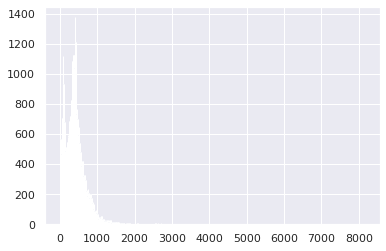

In [102]:
% matplotlib inline
plt.hist([len(x) for x in X], bins=700)

In [106]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
nos = np.array([len(x) for x in X])

len(nos[nos>100])

39285

In [107]:
maxlen = 1000
X = pad_sequences(X, maxlen = maxlen)

In [110]:
len(X[100])

1000

In [118]:
vocab_size = len(tokenizer.word_index)+1
vocab = tokenizer.word_index

In [121]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size,dim))
  for word, i in vocab.items():
    try:
      weight_matrix[i] = model.wv[word]
    except:
      continue
  return weight_matrix

In [122]:
embeding_vectors = get_weight_matrix(w2v_model)

In [126]:
embeding_vectors.shape

(375328, 100)

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Conv1D,MaxPool1D, Embedding

In [149]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = dim, weights = [embeding_vectors], input_length = maxlen, trainable= False))
model.add(LSTM(units = 128))
model.add(Dense(1, activation= "sigmoid"))
model.compile(optimizer = "adam", loss= "binary_crossentropy",metrics = ["acc"])

In [146]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1000, 100)         37532800  
                                                                 
 lstm_7 (LSTM)               (None, 128)               117248    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 37,650,177
Trainable params: 117,377
Non-trainable params: 37,532,800
_________________________________________________________________


In [142]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X,y)

In [150]:
history = model.fit(X_train,y_train, validation_split=0.3, epochs=5)

Epoch 1/5
737/737 [==============================] - 43s 55ms/step - loss: 0.1437 - acc: 0.9453 - val_loss: 0.1373 - val_acc: 0.9378
Epoch 2/5
737/737 [==============================] - 37s 51ms/step - loss: 0.0565 - acc: 0.9804 - val_loss: 0.0518 - val_acc: 0.9814
Epoch 3/5
737/737 [==============================] - 42s 57ms/step - loss: 0.0331 - acc: 0.9881 - val_loss: 0.0421 - val_acc: 0.9851
Epoch 4/5
737/737 [==============================] - 42s 57ms/step - loss: 0.0239 - acc: 0.9920 - val_loss: 0.0202 - val_acc: 0.9941
Epoch 5/5
737/737 [==============================] - 36s 49ms/step - loss: 0.0133 - acc: 0.9956 - val_loss: 0.0248 - val_acc: 0.9921


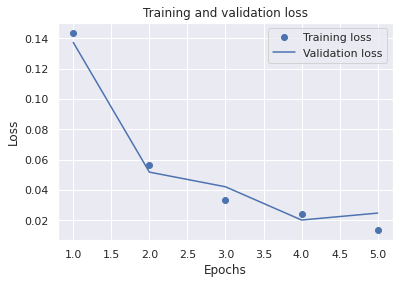

In [151]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

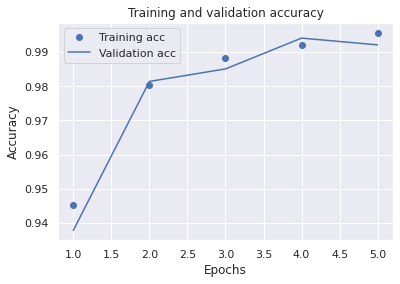

In [155]:
plt.clf()
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [156]:
y_pred = (model.predict(X_test)>0.5).astype(int)

In [159]:
from sklearn.metrics import  accuracy_score, classification_report
accuracy_score(y_test, y_pred)

0.9919821826280624

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5776
           1       1.00      0.99      0.99      5449

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [171]:
x= ["The session, which will be the 41st of the current National Assembly, was summoned after the joint opposition made the requisition for it under Article 54 of the Constitution along with the submission of the no-confidence motion against the prime minister on March 8. According to Article 54, once a session of the National Assembly has been requisitioned with signatures of at least 25 per cent of the members on it, the speaker has a maximum of 14 days to summon a session. Therefore, the speaker had to call the lower house in session by March 22."]
x = tokenizer.texts_to_sequences(x)
x= pad_sequences(x, maxlen = maxlen)
if (model.predict(x)>0.5).astype(int)[0][0]== 1:
  print("Real News")
else:
  print("Fake News")

Real News
